In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import math

In [23]:
pd.set_option("display.max_rows", None)

In [24]:
location = pd.read_csv("0915.csv")

In [25]:
#時間換cos
def string_to_mins(ts):
    a = int(ts.split(':')[0])
    b = int(ts.split(':')[1])
    c = a*60 + b
    return c
location['cos'] = pd.to_datetime(location['start_time'], format='%H:%M', errors='ignore').apply(string_to_mins)
location['cos'] = np.cos((location['cos']/1440)*2*np.pi-0.5*np.pi)

In [26]:
location = location.drop(labels=[0,1,2],axis=0) 

In [27]:
#先取一天做測試
location = location.drop(labels=range(212,3143),axis=0) 

In [7]:
location

,location_id,longitude,latitude,start_date,start_time,weekday,duration,speed,name1,name2,name3,name4,name5,category1,category2,category3,category4,category5,cos
3,4,121.562949,25.087307,2020-09-10,00:25,5,0.0,-1.000000,軟訊資訊有限公司,Family Mart,阿華食堂,7-Eleven,小鳥不吃肉,electronics_store,convenience_store,restaurant,convenience_store,restaurant,0.108867
4,5,121.562949,25.087307,2020-09-10,00:25,5,0.0,-1.000000,軟訊資訊有限公司,Family Mart,阿華食堂,7-Eleven,小鳥不吃肉,electronics_store,convenience_store,restaurant,convenience_store,restaurant,0.108867
5,6,121.562949,25.087307,2020-09-10,00:25,5,0.0,-1.000000,軟訊資訊有限公司,Family Mart,阿華食堂,7-Eleven,小鳥不吃肉,electronics_store,convenience_store,restaurant,convenience_store,restaurant,0.108867
6,7,121.562949,25.087307,2020-09-10,00:25,5,0.0,-1.000000,軟訊資訊有限公司,Family Mart,阿華食堂,7-Eleven,小鳥不吃肉,electronics_store,convenience_store,restaurant,convenience_store,restaurant,0.108867
7,8,121.562925,25.087244,2020-09-10,10:17,5,0.0,-1.000000,軟訊資訊有限公司,阿華食堂,Family Mart,赫里翁 - 接待中心,香香堡速食專賣店,electronics_store,restaurant,convenience_store,real_estate_agency,restaurant,0.434445
8,9,121.562925,25.087244,2020-09-10,10:17,5,0.0,-1.000000,軟訊資訊有限公司,阿華食堂,Family Mart,赫里翁 - 接待中心,香香堡速食專賣店,electronics_store,restaurant,convenience_store,real_estate_agency,restaurant,0.434445
9,10,121.562925,25.087244,2020-09-10,10:17,5,0.0,-1.000000,軟訊資訊有限公司,阿華食堂,Family Mart,赫里翁 - 接待中心,香香堡速食專賣店,electronics_store,restaurant,convenience_store,real_estate_agency,restaurant,0.434445
10,11,121.562925,25.087244,2020-09-10,10:17,5,0.0,-1.000000,軟訊資訊有限公司,阿華食堂,Family Mart,赫里翁 - 接待中心,香香堡速食專賣店,electronics_store,restaurant,convenience_store,real_estate_agency,restaurant,0.434445
11,12,121.563033,25.087216,2020-09-10,10:38,5,0.0,-1.000000,阿華食堂,軟訊資訊有限公司,Family Mart,全聯福利中心Pxmart 內湖文湖,弁當工場 AI智能烤肉飯 文湖店,restaurant,electronics_store,convenience_store,supermarket,restaurant,0.350207
12,13,121.563033,25.087216,2020-09-10,10:38,5,0.0,-1.000000,阿華食堂,軟訊資訊有限公司,Family Mart,全聯福利中心Pxmart 內湖文湖,弁當工場 AI智能烤肉飯 文湖店,restaurant,electronics_store,convenience_store,supermarket,restaurant,0.350207


In [112]:
print(np.cos((1080/1440)*2*np.pi-0.5*np.pi))

-1.0


In [28]:
#要下去clustering的變數
df = pd.DataFrame()
df["longitude"] = location['longitude']
df["latitude"] = location['latitude']
#df["time_cos"] = location['cos']
df

,longitude,latitude
3,121.562949,25.087307
4,121.562949,25.087307
5,121.562949,25.087307
6,121.562949,25.087307
7,121.562925,25.087244
8,121.562925,25.087244
9,121.562925,25.087244
10,121.562925,25.087244
11,121.563033,25.087216
12,121.563033,25.087216


In [29]:
scaler = MinMaxScaler()
data_transform = scaler.fit_transform(df)

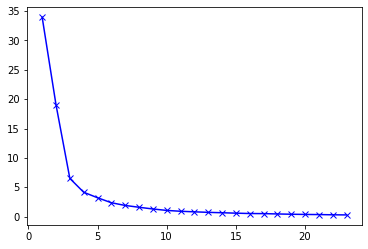

In [30]:
#找最適k值
sum_of_square_distance = []
k_clus = range(1,24)

for k in k_clus:
    model = kmeans = KMeans(n_clusters=k,init='k-means++')
    km = kmeans.fit(data_transform)
    sum_of_square_distance.append(km.inertia_)
plt.plot(k_clus,sum_of_square_distance,'bx-')
plt.show()

In [31]:
n_cluster = 11
model = KMeans(n_clusters=n_cluster,init='k-means++',random_state=42).fit(df)
c_preds = model.predict(df)

In [32]:
location['group'] = c_preds

cols = location.columns.tolist()                    
cols.insert(0, cols.pop(cols.index('group')))
location = location[cols]    

location

,group,location_id,longitude,latitude,start_date,start_time,weekday,duration,speed,name1,name2,name3,name4,name5,category1,category2,category3,category4,category5,cos
3,2,4,121.562949,25.087307,2020-09-10,00:25,5,0.0,-1.000000,軟訊資訊有限公司,Family Mart,阿華食堂,7-Eleven,小鳥不吃肉,electronics_store,convenience_store,restaurant,convenience_store,restaurant,0.108867
4,2,5,121.562949,25.087307,2020-09-10,00:25,5,0.0,-1.000000,軟訊資訊有限公司,Family Mart,阿華食堂,7-Eleven,小鳥不吃肉,electronics_store,convenience_store,restaurant,convenience_store,restaurant,0.108867
5,2,6,121.562949,25.087307,2020-09-10,00:25,5,0.0,-1.000000,軟訊資訊有限公司,Family Mart,阿華食堂,7-Eleven,小鳥不吃肉,electronics_store,convenience_store,restaurant,convenience_store,restaurant,0.108867
6,2,7,121.562949,25.087307,2020-09-10,00:25,5,0.0,-1.000000,軟訊資訊有限公司,Family Mart,阿華食堂,7-Eleven,小鳥不吃肉,electronics_store,convenience_store,restaurant,convenience_store,restaurant,0.108867
7,2,8,121.562925,25.087244,2020-09-10,10:17,5,0.0,-1.000000,軟訊資訊有限公司,阿華食堂,Family Mart,赫里翁 - 接待中心,香香堡速食專賣店,electronics_store,restaurant,convenience_store,real_estate_agency,restaurant,0.434445
8,2,9,121.562925,25.087244,2020-09-10,10:17,5,0.0,-1.000000,軟訊資訊有限公司,阿華食堂,Family Mart,赫里翁 - 接待中心,香香堡速食專賣店,electronics_store,restaurant,convenience_store,real_estate_agency,restaurant,0.434445
9,2,10,121.562925,25.087244,2020-09-10,10:17,5,0.0,-1.000000,軟訊資訊有限公司,阿華食堂,Family Mart,赫里翁 - 接待中心,香香堡速食專賣店,electronics_store,restaurant,convenience_store,real_estate_agency,restaurant,0.434445
10,2,11,121.562925,25.087244,2020-09-10,10:17,5,0.0,-1.000000,軟訊資訊有限公司,阿華食堂,Family Mart,赫里翁 - 接待中心,香香堡速食專賣店,electronics_store,restaurant,convenience_store,real_estate_agency,restaurant,0.434445
11,2,12,121.563033,25.087216,2020-09-10,10:38,5,0.0,-1.000000,阿華食堂,軟訊資訊有限公司,Family Mart,全聯福利中心Pxmart 內湖文湖,弁當工場 AI智能烤肉飯 文湖店,restaurant,electronics_store,convenience_store,supermarket,restaurant,0.350207
12,2,13,121.563033,25.087216,2020-09-10,10:38,5,0.0,-1.000000,阿華食堂,軟訊資訊有限公司,Family Mart,全聯福利中心Pxmart 內湖文湖,弁當工場 AI智能烤肉飯 文湖店,restaurant,electronics_store,convenience_store,supermarket,restaurant,0.350207


In [33]:
#要下去clustering的變數
df_withCos = pd.DataFrame()
df_withCos["longitude"] = location['longitude']
df_withCos["latitude"] = location['latitude']
df_withCos["time_cos"] = location['cos']
location['group'] = c_preds

cols = location.columns.tolist()                    
cols.insert(0, cols.pop(cols.index('group')))
location = location[cols]                        

location

,group,location_id,longitude,latitude,start_date,start_time,weekday,duration,speed,name1,name2,name3,name4,name5,category1,category2,category3,category4,category5,cos
3,2,4,121.562949,25.087307,2020-09-10,00:25,5,0.0,-1.000000,軟訊資訊有限公司,Family Mart,阿華食堂,7-Eleven,小鳥不吃肉,electronics_store,convenience_store,restaurant,convenience_store,restaurant,0.108867
4,2,5,121.562949,25.087307,2020-09-10,00:25,5,0.0,-1.000000,軟訊資訊有限公司,Family Mart,阿華食堂,7-Eleven,小鳥不吃肉,electronics_store,convenience_store,restaurant,convenience_store,restaurant,0.108867
5,2,6,121.562949,25.087307,2020-09-10,00:25,5,0.0,-1.000000,軟訊資訊有限公司,Family Mart,阿華食堂,7-Eleven,小鳥不吃肉,electronics_store,convenience_store,restaurant,convenience_store,restaurant,0.108867
6,2,7,121.562949,25.087307,2020-09-10,00:25,5,0.0,-1.000000,軟訊資訊有限公司,Family Mart,阿華食堂,7-Eleven,小鳥不吃肉,electronics_store,convenience_store,restaurant,convenience_store,restaurant,0.108867
7,2,8,121.562925,25.087244,2020-09-10,10:17,5,0.0,-1.000000,軟訊資訊有限公司,阿華食堂,Family Mart,赫里翁 - 接待中心,香香堡速食專賣店,electronics_store,restaurant,convenience_store,real_estate_agency,restaurant,0.434445
8,2,9,121.562925,25.087244,2020-09-10,10:17,5,0.0,-1.000000,軟訊資訊有限公司,阿華食堂,Family Mart,赫里翁 - 接待中心,香香堡速食專賣店,electronics_store,restaurant,convenience_store,real_estate_agency,restaurant,0.434445
9,2,10,121.562925,25.087244,2020-09-10,10:17,5,0.0,-1.000000,軟訊資訊有限公司,阿華食堂,Family Mart,赫里翁 - 接待中心,香香堡速食專賣店,electronics_store,restaurant,convenience_store,real_estate_agency,restaurant,0.434445
10,2,11,121.562925,25.087244,2020-09-10,10:17,5,0.0,-1.000000,軟訊資訊有限公司,阿華食堂,Family Mart,赫里翁 - 接待中心,香香堡速食專賣店,electronics_store,restaurant,convenience_store,real_estate_agency,restaurant,0.434445
11,2,12,121.563033,25.087216,2020-09-10,10:38,5,0.0,-1.000000,阿華食堂,軟訊資訊有限公司,Family Mart,全聯福利中心Pxmart 內湖文湖,弁當工場 AI智能烤肉飯 文湖店,restaurant,electronics_store,convenience_store,supermarket,restaurant,0.350207
12,2,13,121.563033,25.087216,2020-09-10,10:38,5,0.0,-1.000000,阿華食堂,軟訊資訊有限公司,Family Mart,全聯福利中心Pxmart 內湖文湖,弁當工場 AI智能烤肉飯 文湖店,restaurant,electronics_store,convenience_store,supermarket,restaurant,0.350207


In [ ]:
scaler = MinMaxScaler()
data_transform = scaler.fit_transform(df)
n_cluster = 20
model = KMeans(n_clusters=n_cluster,init='k-means++',random_state=42).fit(df)
c_preds = model.predict(df)

In [75]:
n_cluster = 10
model = KMeans(n_clusters=n_cluster,init='k-means++',random_state=42).fit(df)
c_preds = model.predict(df)
plt.figure(figsize=(8,8))
centers = model.cluster_centers_
colors = ['red','orange','blue','purple','green','gray','black','yellow','white','cyan']
#colored = [colors[k] for k in c_preds]
plt.scatter(df[4] , df[1], c=colors)
for ci,c in enumerate(centers):
    plt.plot(c[0],c[1],'o',markersize = 8,color = color[ci],alpha = 0.9,label = ''+str(ci))
plt.legend()
plt.show()

KeyError: 4

<Figure size 576x576 with 0 Axes>

In [6]:
df = pd.DataFrame({
    'x': location['longitude'],
    'y': location['latitude'],
    'z': location['cos']
})
kmeans = KMeans(n_clusters=5)
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [11]:
cluster_labels = kmeans.fit(df).labels_
print(cluster_labels)

[2 2 2 ... 0 0 0]


In [49]:
labels = kmeans.predict(df)
centroids = kmeans.cluster_centers_

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/collections.py:874: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


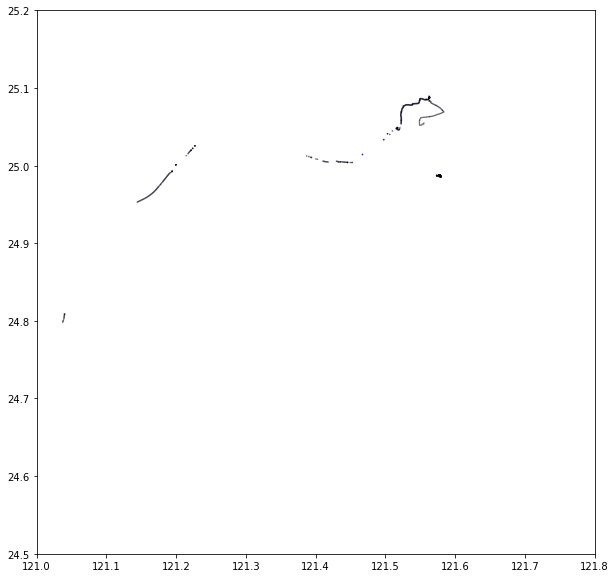

In [50]:
fig = plt.figure(figsize=(10,10))

colmap = {1:'r', 2:'g',3:'b', 4:'gray', 5:'cyan'}
colors = map(lambda x: colmap[x+1], labels)

plt.scatter(df['x'], df['y'], df['z'], color=list(colors), alpha=0.5, edgecolor = 'k')
for idx, centroid in enumerate(centroids):
    plt.scatter(*centroid, color=colmap[idx+1])

plt.xlim(121.0,121.8)
plt.ylim(24.5,25.2)
plt.show()